In [1]:
#Padigela Srinithya Reddy
#BL.EN.U4CSE21146

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [2]:
dt = pd.read_csv("Skin_Cancer_Metadata.csv")
dt

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
label_encoder = LabelEncoder()
dt['sex'] = label_encoder.fit_transform(dt['sex'])
dt.to_csv('encoded_file.csv', index=False)

In [4]:
dt = pd.read_csv("encoded_file.csv")
dt

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,1,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,1,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,1,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,1,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,1,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,1,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,1,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,1,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,1,face


In [5]:
dt['dx_type'] = label_encoder.fit_transform(dt['dx_type'])
dt.to_csv('encoded_file.csv', index=False)

In [6]:
dt['localization'] = label_encoder.fit_transform(dt['localization'])
dt.to_csv('encoded_skin_cancer.csv', index=False)

In [7]:
label_encoder = LabelEncoder()
dt['dx'] = label_encoder.fit_transform(dt['dx'])
dt.to_csv('encoded_skin_cancer.csv', index=False)

In [8]:
dt = pd.read_csv("encoded_skin_cancer.csv")
dt

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,3,40.0,1,0
10011,HAM_0002867,ISIC_0033550,0,3,40.0,1,0
10012,HAM_0002867,ISIC_0033536,0,3,40.0,1,0
10013,HAM_0000239,ISIC_0032854,0,3,80.0,1,5


In [9]:
import warnings
warnings.filterwarnings("ignore")

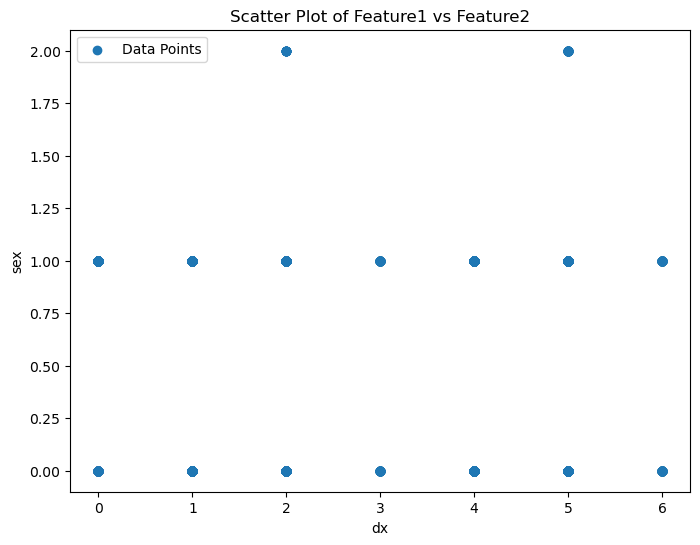

In [12]:
#Linear Regression 
ft1 = dt['dx']
ft2 = dt['sex']
plt.figure(figsize=(8, 6))
plt.scatter(ft1, ft2,marker='o', label='Data Points')
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('dx')
plt.ylabel('sex')
plt.legend()
plt.show()

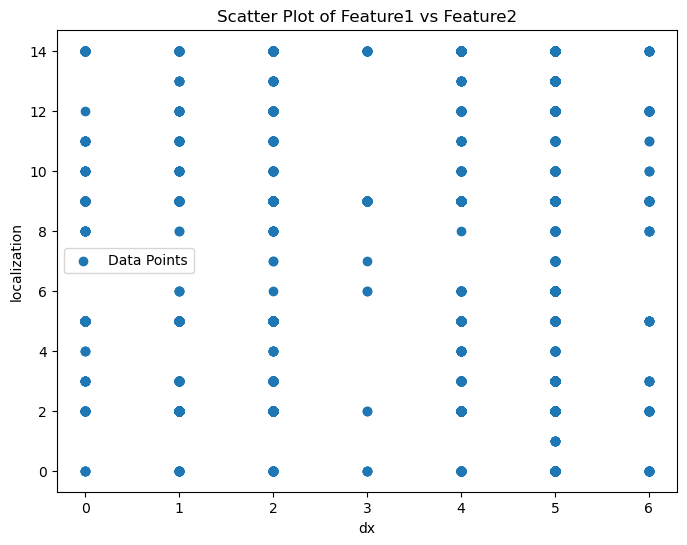

In [13]:
ft1 = dt['dx']
ft2 = dt['localization']
plt.figure(figsize=(8, 6))
plt.scatter(ft1, ft2,marker='o', label='Data Points')
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('dx')
plt.ylabel('localization')
plt.legend()
plt.show()

In [17]:
dt = dt.fillna(dt.mean())

In [18]:
X = dt[['age']]
y = dt['dx']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
dt.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [22]:
predY = model.predict(X_test)
mse = mean_squared_error(y_test, predY)
rd_mse = round(mse)

print(f"Mean Squared Error: {mse}")
print(f"Rounded Mean Squared Error: {rd_mse}")


Mean Squared Error: 1.6547905450190565
Rounded Mean Squared Error: 2


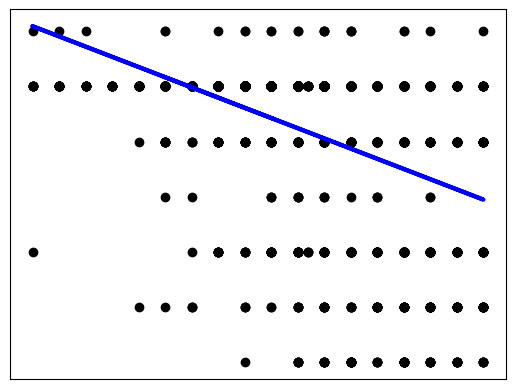

In [25]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, predY, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [27]:
dt = pd.read_csv("encoded_skin_cancer.csv")
dt

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,0,3,40.0,1,0
10011,HAM_0002867,ISIC_0033550,0,3,40.0,1,0
10012,HAM_0002867,ISIC_0033536,0,3,40.0,1,0
10013,HAM_0000239,ISIC_0032854,0,3,80.0,1,5


In [28]:
count = dt['sex'].nunique()
count

3

In [31]:
sum1 = sum(dt['sex'] == 1) #male
print(sum1)
sum2 = sum(dt['sex'] == 0) #female
print(sum2)
sum3 = sum(dt['sex'] == 2) #other
print(sum3)

5406
4552
57


In [32]:
s1 = sum(dt['dx'] == 0) #akiec
print(s1)
s2 = sum(dt['dx'] == 1) #bcc
print(s2)
s3 = sum(dt['dx'] == 2) #bkl
print(s3)
s4 = sum(dt['dx'] == 3) #df
print(s4)
s5 = sum(dt['dx'] == 4) #mel
print(s5)
s6 = sum(dt['dx'] == 5) #nv
print(s6)
s7 = sum(dt['dx'] == 6) #vasc
print(s7)

327
514
1099
115
1113
6705
142


In [33]:
#Logistic Regression
data = dt[dt['sex'].isin([0,1])]
data = dt[dt['dx'].isin([4,5])]

X =  data[['sex']]
y =  data[['dx']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
model = LogisticRegression(random_state=42, max_iter=100) 
model.fit(X_train, y_train)
predY = model.predict(X_test)
acc = accuracy_score(y_test, predY)

print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 84.72%


In [38]:
cls_report_str = classification_report(y_test, predY)
print("Classification Report:")
print(cls_report_str)

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       239
           5       0.85      1.00      0.92      1325

    accuracy                           0.85      1564
   macro avg       0.42      0.50      0.46      1564
weighted avg       0.72      0.85      0.78      1564



In [39]:
#Regression Tree and k-NN Regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = dt[['localization','sex']]
y = dt[['dx']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

knn_reg = KNeighborsRegressor(n_neighbors=3) 
knn_reg.fit(X_train, y_train)

tree_pred = tree_reg.predict(X_test)
knn_pred = knn_reg.predict(X_test)

tree_abs_err = mean_absolute_error(y_test, tree_pred)
tree_sqr_err = mean_squared_error(y_test, tree_pred)

knn_absolute_err = mean_absolute_error(y_test, knn_pred)
knn_sqr_err = mean_squared_error(y_test, knn_pred)

print("Decision Tree Regressor Metrics:")
print("Mean absolute error is :",tree_abs_err)
print("Mean squared error is :",tree_sqr_err)

print("k-NN Regressor Metrics:")
print("Mean absolute error is :",knn_absolute_err)
print("Mean squared error is :",knn_sqr_err)


Decision Tree Regressor Metrics:
Mean absolute error is : 0.9594566691784152
Mean squared error is : 1.7343630032814243
k-NN Regressor Metrics:
Mean absolute error is : 1.1780662339823598
Mean squared error is : 2.350418816220114
